# **Milestone 3: Exploratory Data Analysis (EDA)**

## Advanced EDA: Nulls, Duplicates, Inconsistencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [2]:
cleaned_df=pd.read_csv('cleaned_dynamic_pricing.csv')

In [3]:
print('Null values per column:')
print(cleaned_df.isnull().sum())

Null values per column:
Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


In [4]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [5]:
print('\nDuplicate rows:', cleaned_df.duplicated().sum())


print('\nSummary statistics:')
print(cleaned_df.describe()) # Only for numerical columns


Duplicate rows: 0

Summary statistics:
       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000     

In [6]:
cleaned_df.describe(include='object')# Only for categorical columns

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


## Basic Visualization: Distribution of Numeric Features

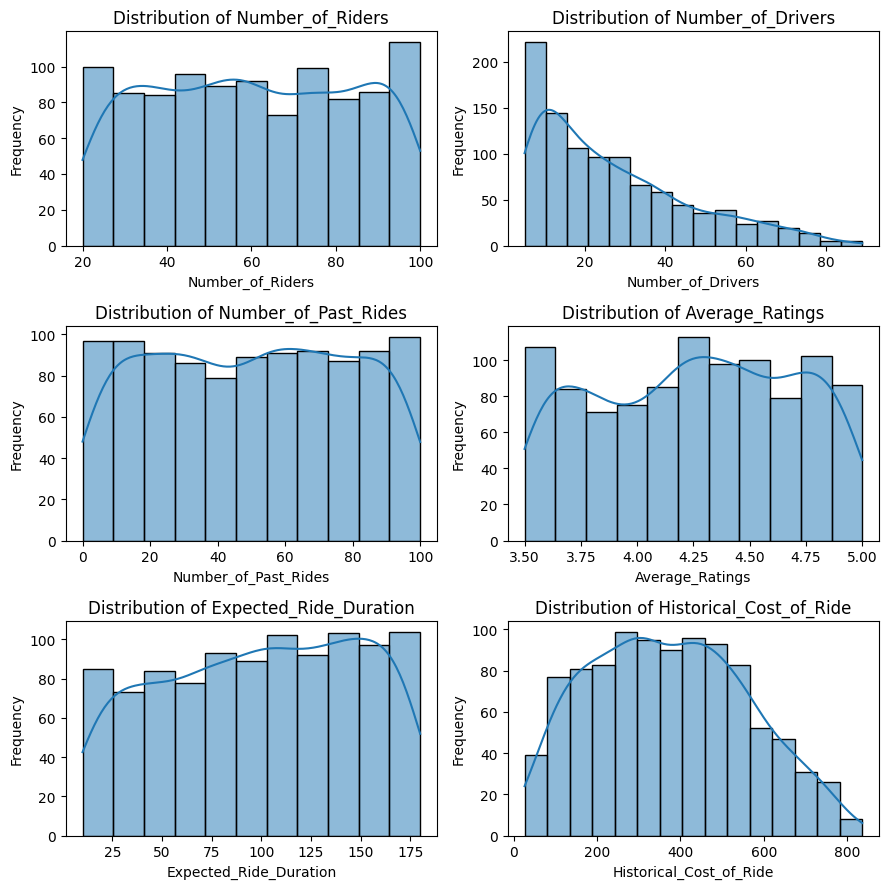

In [7]:
numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = len(numeric_cols)
cols = 2  # Number of columns in the subplot grid
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(9, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(cleaned_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Outlier Detection: Boxplot and IQR  

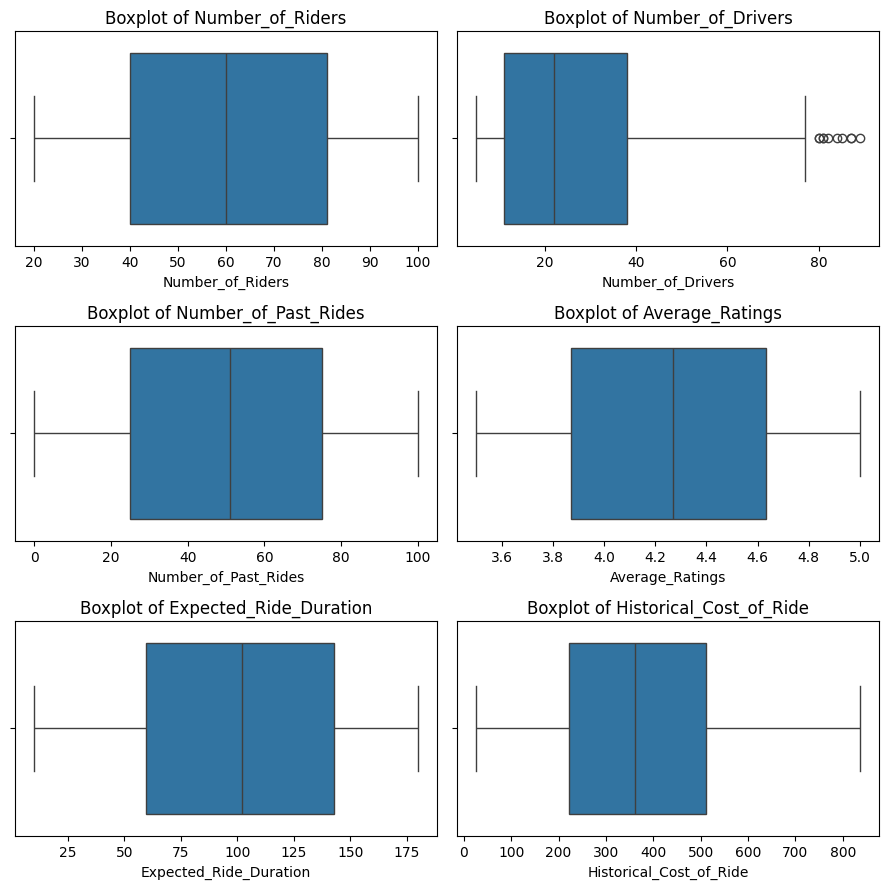

In [8]:
num_cols = len(numeric_cols)
cols = 2  # Number of columns in the subplot grid
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(9, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=cleaned_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [9]:
outliers_iqr = {}
for col in numeric_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = cleaned_df[(cleaned_df[col] < lower_bound) | (cleaned_df[col] > upper_bound)].index
    outliers_iqr[col] = outlier_indices
    print(f'Outliers in {col} (IQR method):', len(outlier_indices))

Outliers in Number_of_Riders (IQR method): 0
Outliers in Number_of_Drivers (IQR method): 10
Outliers in Number_of_Past_Rides (IQR method): 0
Outliers in Average_Ratings (IQR method): 0
Outliers in Expected_Ride_Duration (IQR method): 0
Outliers in Historical_Cost_of_Ride (IQR method): 0


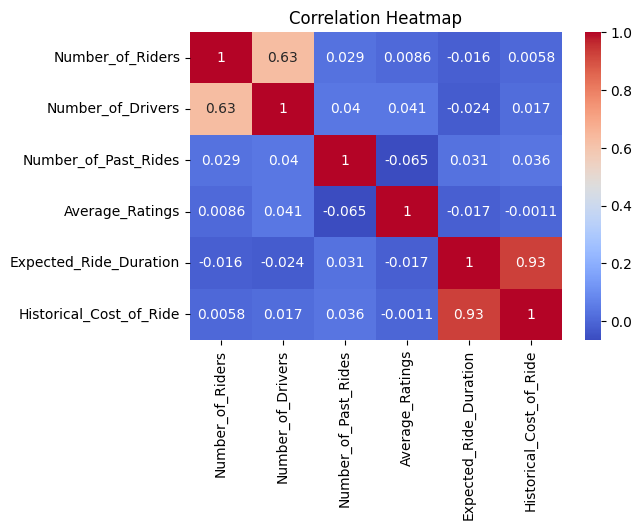

In [10]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
corr = cleaned_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Scatter Plot For Linear Relationship

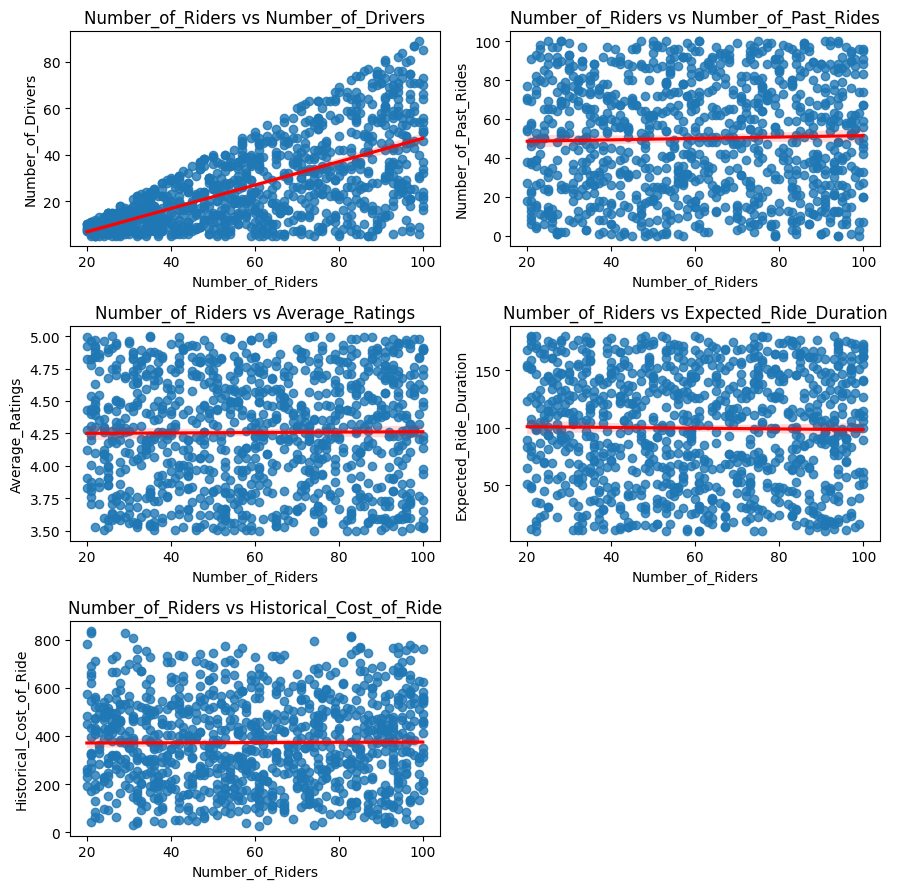

In [11]:
num_cols = len(numeric_cols)
cols = 2  
rows = math.ceil((num_cols - 1) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(9, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[1:]):
    sns.regplot(x=cleaned_df[numeric_cols[0]], y=cleaned_df[col], ax=axes[i], scatter=True, line_kws={'color': 'red'})
    axes[i].set_title(f'{numeric_cols[0]} vs {col}')
    axes[i].set_xlabel(numeric_cols[0])
    axes[i].set_ylabel(col)

# To Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

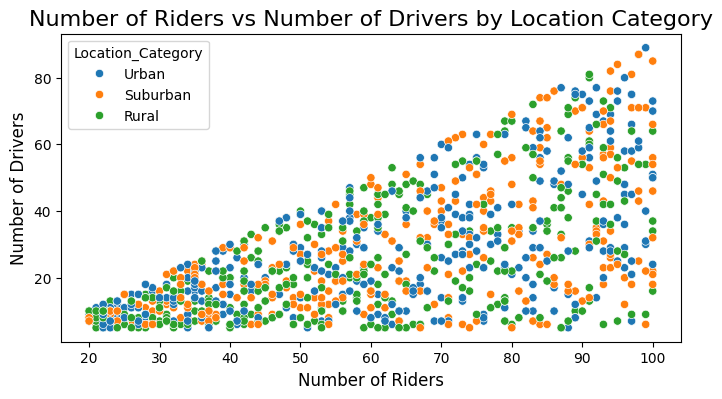

In [12]:
#Number of Riders vs Number of Drivers by Location Category
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Number_of_Riders', y='Number_of_Drivers', data=cleaned_df, hue='Location_Category')
plt.title('Number of Riders vs Number of Drivers by Location Category', fontsize=16)
plt.xlabel('Number of Riders', fontsize=12)
plt.ylabel('Number of Drivers', fontsize=12)
plt.show()

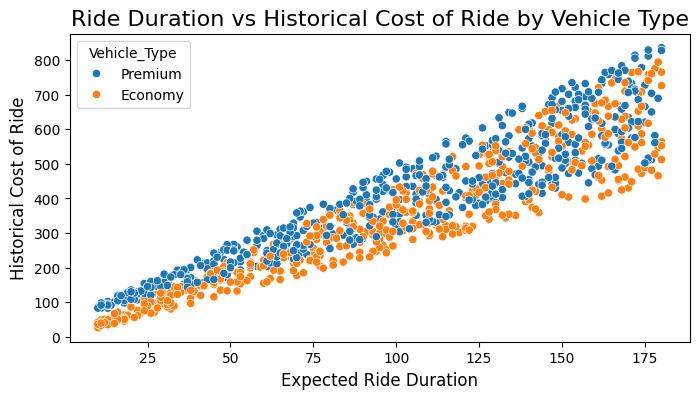

In [13]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', data=cleaned_df, hue='Vehicle_Type')
plt.title('Ride Duration vs Historical Cost of Ride by Vehicle Type', fontsize=16)
plt.xlabel('Expected Ride Duration', fontsize=12)
plt.ylabel('Historical Cost of Ride', fontsize=12)
plt.show()

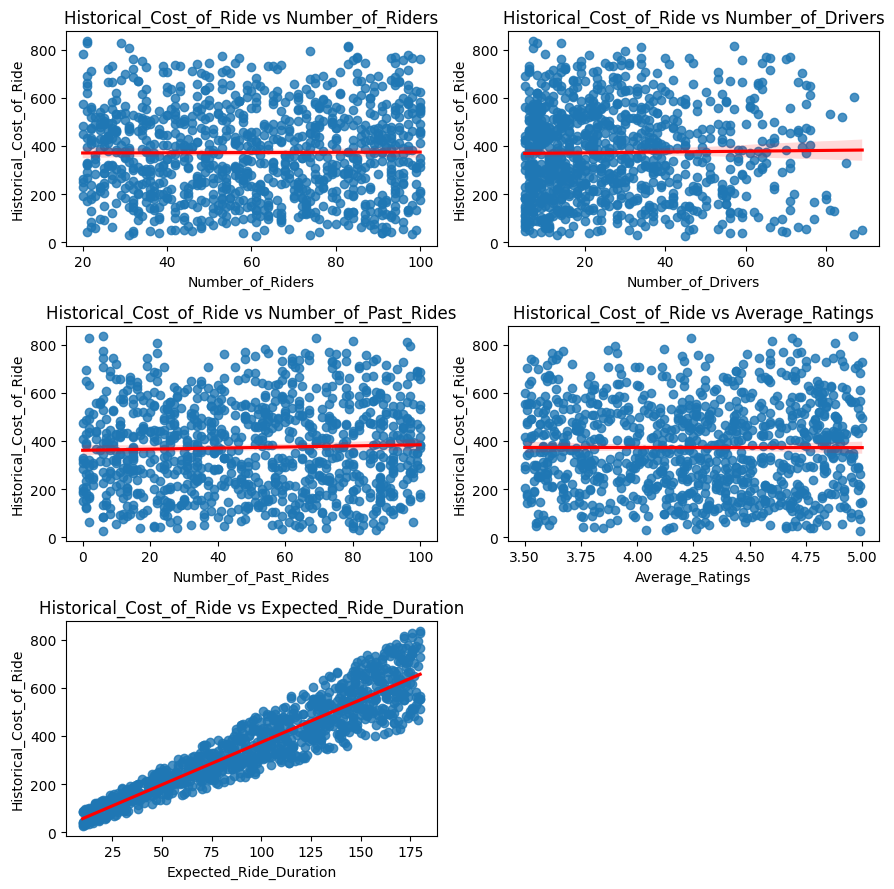

In [14]:
num_cols = len(numeric_cols)
cols = 2  
rows = math.ceil((num_cols - 1) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(9, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols[0:5]):
    sns.regplot(x=cleaned_df[col],y=cleaned_df[numeric_cols[5]], ax=axes[i], scatter=True, line_kws={'color': 'red'})
    axes[i].set_title(f'{numeric_cols[5]} vs {col}')
    axes[i].set_ylabel(numeric_cols[5])
    axes[i].set_xlabel(col)

# To Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

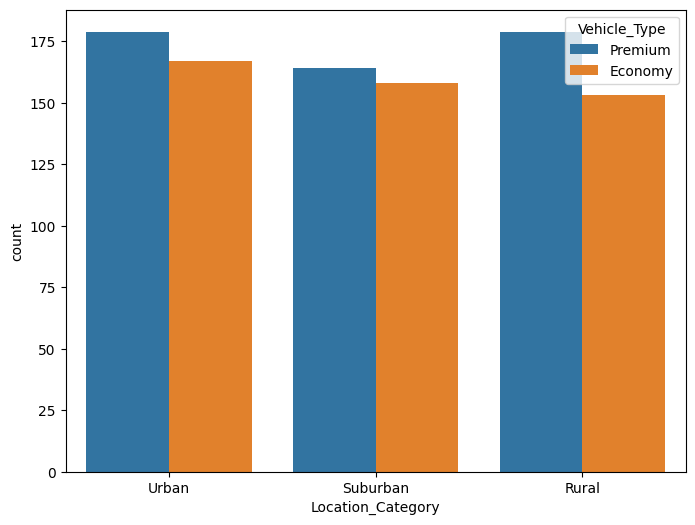

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Location_Category', data=cleaned_df, hue='Vehicle_Type')
plt.show()

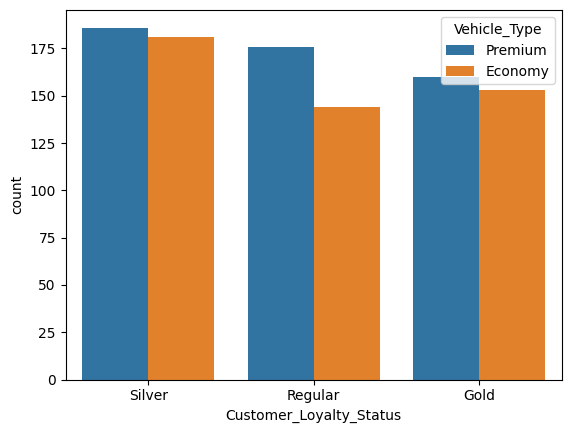

In [16]:
sns.countplot(x='Customer_Loyalty_Status', data=cleaned_df, hue='Vehicle_Type')
plt.show()

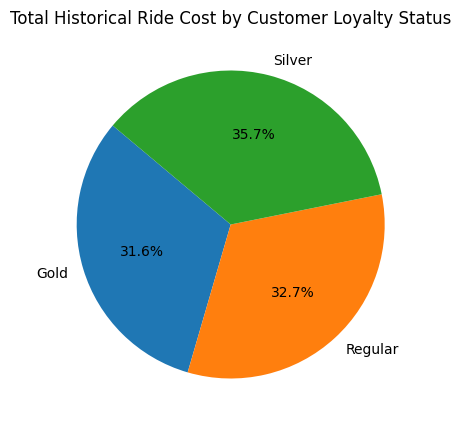

In [17]:
# Pie plot for Customer_Loyalty_Status using sum of Historical_Cost_of_Ride
loyalty_cost_sum = cleaned_df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].sum()
plt.figure(figsize=(5, 5))
plt.pie(loyalty_cost_sum, labels=loyalty_cost_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Historical Ride Cost by Customer Loyalty Status')
plt.show()

## Seasonality

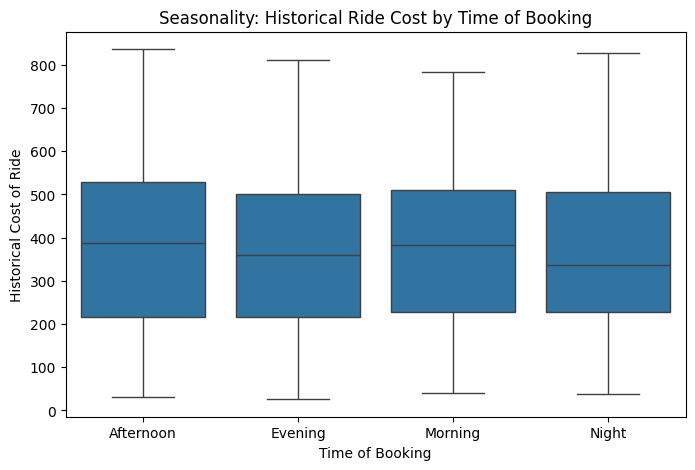

In [18]:
### using boxplot to show seasonality
plt.figure(figsize=(8, 5))
sns.boxplot(x='Time_of_Booking', y='Historical_Cost_of_Ride', data=cleaned_df, order=sorted(cleaned_df['Time_of_Booking'].unique()))
plt.title('Seasonality: Historical Ride Cost by Time of Booking')
plt.xlabel('Time of Booking')
plt.ylabel('Historical Cost of Ride')
plt.show()

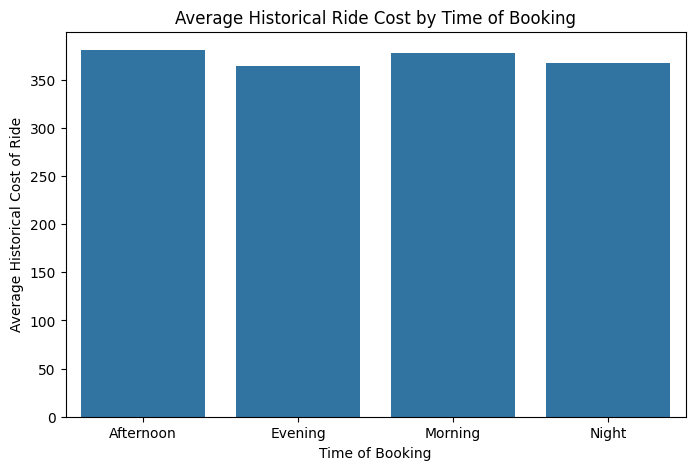

In [19]:
# Group by 'Time_of_Booking' and plot the mean Historical_Cost_of_Ride
grouped = cleaned_df.groupby('Time_of_Booking')['Historical_Cost_of_Ride'].mean().reindex(sorted(cleaned_df['Time_of_Booking'].unique()))
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y=grouped.values)
plt.title('Average Historical Ride Cost by Time of Booking')
plt.xlabel('Time of Booking')
plt.ylabel('Average Historical Cost of Ride')
plt.show()